## 영상정보처리 7주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 10점 

이름: 이상민            
학번: 32153180


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My\ Drive/ImageProcClass/Week7
%ls

/gdrive/My Drive/ImageProcClass/Week7
2020-2-ImgProc-HW7-이상민-32153180.ipynb  2020-2-ImgProc-HW7-Template.ipynb


In [3]:
!pwd
%ls ../

/gdrive/My Drive/ImageProcClass/Week7
 Dongkeun-OpenCV-ImgData/                        Week2/   Week5/
'Mastering Opencv 4 wiht Python - SourceCode'/   Week3/   Week6/
 Week1/                                          Week4/   Week7/


다음의 경로는 변경하지 말것

In [6]:
image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg' 

##문제 1:


1. 주어진 영상을 grayscale 로 읽어 들인다 (org_img)
2. 입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 소스코드 color_map_custom_key_colors.py를 참조하여, 자신이 원하는대로 컬러맵을 5개의 값을 이용해 만든다.  
4. 소스코드 color_map_custom_legend.py를 참조하여, Legend를 만든 후 "Legend"라는 타이틀을 부여한 후 출력한다. 
5. 만들어진 컬러맵을 LUT(), applyColorMap()을 이용해 컬러맵을 주어진 영상에 적용해서 두 개의 이미지의 타이틀을 각각 "LUT() Application", "applyColorMap() Application" 로 한 다음 출력한다. 





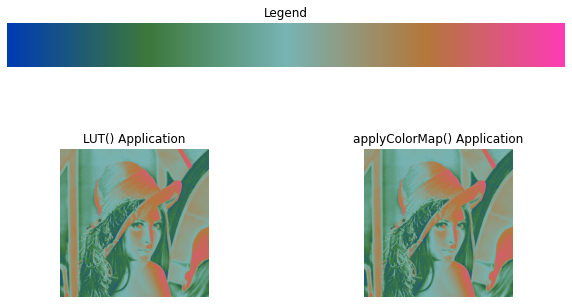

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

org_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
new_image = np.zeros(org_img.shape, dtype=np.uint8)

# function for legend bar image
def build_lut_image(cmap, height):
    lut = build_lut(cmap)
    image = np.repeat(lut[np.newaxis, ...], height, axis=0)

    return image

# function for lookup table
def build_lut(cmap):
    lut = np.empty(shape=(256, 3), dtype=np.uint8)
    max = 256

    lastval, lastcol = cmap[0]
    for step, col in cmap[1:]:
        val = int(step * max)
        for i in range(3):
            lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)

        lastcol = col
        lastval = val

    return lut

# function for custom color map using LUT()
def lut_func(gray, cmap):
    lut = build_lut(cmap)
    s0, s1 = gray.shape
    out = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        out[..., i] = cv2.LUT(gray, lut[:, i])
    return out

# function for custom color map using applyColorMap()
def apply_func(gray, cmap):
    lut = build_lut(cmap)
    lut_reshape = np.reshape(lut, (256, 1, 3))
    im_color = cv2.applyColorMap(gray, lut_reshape)
    return im_color

def show_with_matplotlib(color_img, title, pos):
    # BGR to RGB
    img_RGB = color_img[:, :, ::-1]

    if pos == 1:
      ax = plt.subplot(2, 1, pos)
    else:
      ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

# 5개의 값을 이용한 color map 작성
my_color_map = (
    (0, (180, 60, 0)), 
    (0.25, (60, 120, 60)), 
    (0.5, (180, 180, 120)),
    (0.75, (60, 120, 180)), 
    (1.0, (180, 60, 255))
)

plt.figure(figsize=(10, 6))
lut = lut_func(gray_img, my_color_map)
apply = apply_func(gray_img, my_color_map)
legend_bar = build_lut_image(my_color_map, 20)
show_with_matplotlib(legend_bar, "Legend", 1)
show_with_matplotlib(lut, "LUT() Application", 3)
show_with_matplotlib(apply, "applyColorMap() Application", 4)
plt.show()